In [1]:
#Grovers Search algorithm :-Reference qiskit textbook
from qiskit import *
%matplotlib inline
from qiskit.visualization import plot_histogram

In [2]:
#marking qubits 011 and 101 as solutions
def phase_oracle(circuit, register):
    circuit.cz(qr[2],qr[0])
    circuit.cz(qr[1],qr[0])

In [3]:
#inversion about the average stage
def n_controlled_Z(circuit, controls, target):
    if (len(controls) > 2):
        raise ValueError
    elif (len(controls) == 1):
        circuit.h(target)
        circuit.cx(controls[0], target)
        circuit.h(target)
    elif (len(controls) == 2):
        circuit.h(target)
        circuit.ccx(controls[0], controls[1], target)
        circuit.h(target)

In [4]:
def inversion_about_average(circuit, register, n, barriers):
    circuit.h(register)
    circuit.x(register)
    
    if barriers:
        circuit.barrier()
    
    n_controlled_Z(circuit, [register[j] for j in range(n-1)], register[n-1])
    
    if barriers:
        circuit.barrier()
    
    circuit.x(register)
    circuit.h(register)

In [5]:
barriers = True

qr = QuantumRegister(3)
cr = ClassicalRegister(3)

gc = QuantumCircuit(qr,cr)
gc.h(qr)

if barriers:
    gc.barrier()

phase_oracle(gc, qr)

if barriers:
    gc.barrier()

inversion_about_average(gc, qr, 3, barriers)

if barriers:
    gc.barrier()

gc.measure(qr,cr)

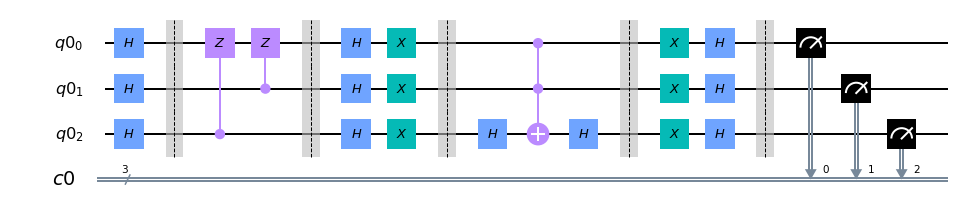

In [6]:
gc.draw(output="mpl")

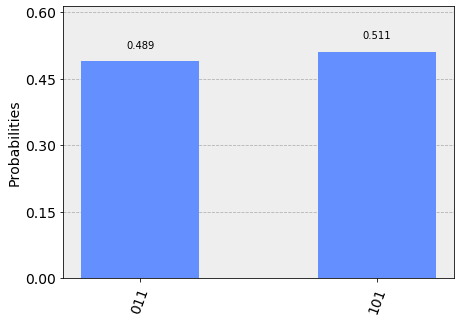

In [7]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(gc, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [8]:
from qiskit.providers.ibmq import least_busy
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [9]:
provider= IBMQ.get_provider('ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_vigo


In [10]:
from qiskit.tools.monitor import job_monitor
shots = 1024
job = execute(gc, backend=backend, shots=shots)
job_monitor(job, interval = 2)

Job Status: job has successfully run


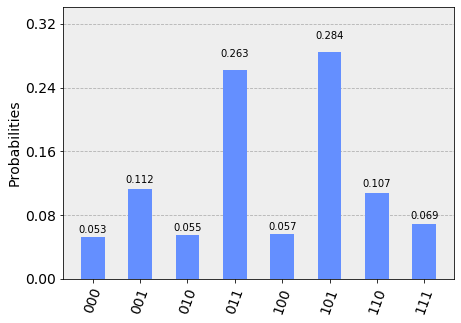

In [11]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)